In [1]:
!pip show pycaret

Name: pycaret
Version: 1.0.0
Summary: An open source, low-code machine learning library in Python
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: c:\users\david\anaconda3\envs\yourenvname\lib\site-packages
Requires: matplotlib, gensim, umap-learn, spacy, IPython, pandas, xgboost, wordcloud, awscli, numpy, seaborn, lightgbm, plotly, datetime, textblob, ipywidgets, yellowbrick, pyLDAvis, kmodes, scikit-learn, nltk, pyod, joblib, catboost, datefinder, mlxtend, pandas-profiling, cufflinks, shap, DateTime
Required-by: 


In [2]:
import pandas as pd
# open dataset
dataset = pd.read_csv('rental_data.csv')
print(dataset.shape)


(18643, 9)


In [3]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (16779, 9)
Unseen Data For Predictions: (1864, 9)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16779 entries, 0 to 16778
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    16779 non-null  object 
 1   hr                      16779 non-null  int64  
 2   temperature             16779 non-null  object 
 3   feels_like_temperature  16779 non-null  float64
 4   relative_humidity       16779 non-null  float64
 5   windspeed               16779 non-null  float64
 6   psi                     16779 non-null  int64  
 7   guest_scooter           16779 non-null  int64  
 8   registered_scooter      16779 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.2+ MB


In [5]:
print('shape:', data.shape)
# Find correlations and sort
data.corr()['registered_scooter'].sort_values()

shape: (16779, 9)


relative_humidity        -0.271980
psi                      -0.014965
windspeed                 0.078883
feels_like_temperature    0.331049
hr                        0.371466
guest_scooter             0.504186
registered_scooter        1.000000
Name: registered_scooter, dtype: float64

In [6]:
# Importing module and initializing setup
from pycaret.regression import *
reg1 = setup(data = data, target = 'registered_scooter')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,814
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(16779, 9)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,219.038100,138367.275300,371.646900,0.876500,0.421900,0.387700
1,CatBoost Regressor,244.213500,140525.283900,374.570900,0.874800,0.588900,0.571600
2,Light Gradient Boosting Machine,240.641500,142188.613200,376.853600,0.873300,0.535200,0.518600
3,Random Forest,233.979200,147511.772000,383.795500,0.868500,0.435600,0.405100
4,Gradient Boosting Regressor,315.507900,230406.128600,479.604000,0.795500,0.725200,0.740900
5,Extreme Gradient Boosting,317.449200,232299.047300,481.704100,0.793700,0.736100,0.756700
6,Decision Tree,298.733400,270460.099700,519.811600,0.759200,0.586800,0.479900
7,AdaBoost Regressor,526.153100,457739.647100,676.285600,0.592700,1.029500,1.983200
8,K Neighbors Regressor,538.223900,668541.983000,817.172800,0.406600,0.893200,1.244100
9,Lasso Regression,570.348200,680361.617100,824.216500,0.396600,1.236800,2.978100


In [8]:
et = create_model('et', fold = 5, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,212.45,124651.74,353.06,0.89,0.41,0.38
1,222.54,137144.84,370.33,0.89,0.43,0.37
2,223.95,145627.83,381.61,0.87,0.41,0.38
3,228.13,143009.10,378.17,0.87,0.45,0.41
4,224.95,150816.88,388.35,0.86,0.43,0.41
Mean,222.40,140250.08,374.30,0.88,0.43,0.39
SD,5.31,8957.01,12.11,0.01,0.02,0.02


In [9]:
boosted_et = ensemble_model(et, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,213.5585,121778.4574,348.9677,0.8944,0.4961,0.5292
1,206.8243,117305.3920,342.4987,0.8881,0.3874,0.3561
2,218.1304,122488.2990,349.9833,0.8994,0.4721,0.4662
3,227.0199,141945.1901,376.7561,0.8868,0.4583,0.3343
4,226.5412,136347.3324,369.2524,0.8624,0.4271,0.4114
5,225.2571,145781.5667,381.8135,0.8793,0.4687,0.4404
6,224.9953,131035.7244,361.9886,0.8909,0.4678,0.4289
7,220.6905,134274.1322,366.4343,0.8749,0.4799,0.4477
8,224.2478,140344.0260,374.6252,0.8692,0.4673,0.4473
9,224.7149,147982.4434,384.6849,0.8601,0.4631,0.4683


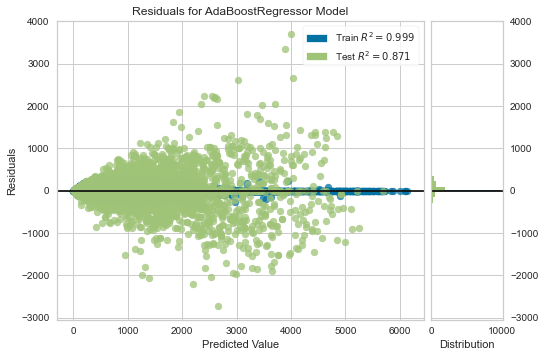

In [10]:
plot_model(boosted_et)

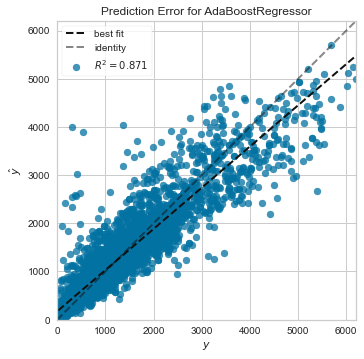

In [11]:
plot_model(boosted_et, plot = 'error')

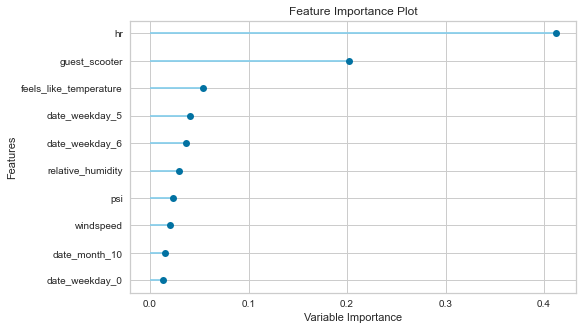

In [12]:
plot_model(boosted_et, plot='feature')

In [13]:
evaluate_model(boosted_et)

,Parameters
base_estimator__bootstrap,False
base_estimator__ccp_alpha,0
base_estimator__criterion,mse
base_estimator__max_depth,None
base_estimator__max_features,auto
base_estimator__max_leaf_nodes,None
base_estimator__max_samples,None
base_estimator__min_impurity_decrease,0
base_estimator__min_impurity_split,None
base_estimator__min_samples_leaf,1


In [14]:
predict_model(boosted_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ada Boost Regressor,222.0969,142226.0713,377.1287,0.8707,0.4584,0.4726


,hr,feels_like_temperature,relative_humidity,windspeed,psi,guest_scooter,temperature_CLEAR,temperature_CLOUDY,temperature_LIGHT SNOW/RAIN,temperature_clar,...,date_weekday_1,date_weekday_2,date_weekday_3,date_weekday_4,date_weekday_5,date_weekday_6,date_is_month_end_0,date_is_month_start_1,registered_scooter,Label
0,15.0,134.6,69.0,22.0,0.0,138.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,817,1076.07
1,19.0,132.8,73.0,9.0,24.0,215.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1881,1460.41
2,7.0,114.8,88.0,9.0,36.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1985,2336.98
3,7.0,111.2,100.0,30.0,38.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,39,131.62
4,7.0,98.6,66.0,15.0,32.0,37.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,208,407.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5029,8.0,82.4,32.0,24.0,21.0,32.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1490,2509.46
5030,2.0,107.6,94.0,0.0,10.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,38.63
5031,0.0,125.6,88.0,0.0,24.0,20.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,205,220.79
5032,11.0,111.2,67.0,6.0,44.0,135.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1120,1165.23


In [15]:
final_et = finalize_model(boosted_et)
print(final_et)

AdaBoostRegressor(base_estimator=ExtraTreesRegressor(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                             

In [16]:
save_model(final_et,'Final ExtraTrees Model')

Transformation Pipeline and Model Succesfully Saved


In [17]:
saved_final_et = load_model('Final ExtraTrees Model')
new_prediction = predict_model(saved_final_et, data=data_unseen)
new_prediction.head()

,date,hr,temperature,feels_like_temperature,relative_humidity,windspeed,psi,guest_scooter,registered_scooter,Label
0,2012-06-13,22,clear,134.6,50.0,20.0,8,86,1468,1468.00
1,2011-04-17,7,clear,100.4,50.0,24.0,3,6,99,133.11
2,2012-07-08,13,clar,165.2,38.0,17.0,33,353,1534,1534.00
3,2012-05-15,13,light snow/rain,132.8,73.0,13.0,24,107,1432,1432.00
4,2012-05-16,3,clear,123.8,88.0,7.0,8,5,36,36.00


In [18]:
new_prediction.tail()

,date,hr,temperature,feels_like_temperature,relative_humidity,windspeed,psi,guest_scooter,registered_scooter,Label
1859,2011-06-11,19,clear,138.2,65.0,13.0,5,290,1174,1174.00
1860,2011-11-21,14,cloudy,116.6,82.0,13.0,43,40,849,849.00
1861,2012-04-17,9,clear,134.6,38.0,33.0,10,211,2306,2306.00
1862,2012-10-25,21,cloudy,120.2,88.0,9.0,28,73,1728,1728.00
1863,2011-07-26,21,clear,145.4,49.0,15.0,39,134,1557,1675.86
